## Testing speed List vs Numpy

In [69]:
#list
a = [i for i in range(10000000)]
b = [i for i in range (10000000,20000000)]
c = []

import time
start = time.time()

for i in range(len(a)):
    c.append(a[i]+b[i])

print(time.time()-start)


1.0041263103485107


In [70]:
#Numpy
import numpy as np
a1 = np.arange(10000000)
b1 = np.arange(10000000,20000000)
import time
start = time.time()
c = a1+b1
print(time.time()-start)

0.08250999450683594


### Memory

In [71]:
# List
a = [ i for i in range(10000000)]
import sys

sys.getsizeof(a)



89095160

In [72]:
# Numpy 
a3 = np.arange(10000000)
import sys
sys.getsizeof(a3)

40000112

#### Fancy Indexing

In [73]:
### Fancy Indexing
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [74]:
# e.g -> Extracting 2,4,6 th raw

a[[1,3,5]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [75]:
# e.g -> Extracting  2,3,4 column 
a[:,[1,2,3]]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15],
       [17, 18, 19],
       [21, 22, 23]])

## Boolean Indexing
- it return 1D array and create a temporary array

In [76]:
a=np.random.randint(1,100,24).reshape(6,4)
a

array([[ 6, 16, 30, 18],
       [ 7, 69, 23, 23],
       [12, 39, 24, 44],
       [90, 77, 86, 78],
       [92, 67, 59,  1],
       [64, 69, 51, 80]])

In [77]:
# Find numbers greater than 50

a[a>50]

array([69, 90, 77, 86, 78, 92, 67, 59, 64, 69, 51, 80])

In [78]:
# Find even Number

a[a % 2 == 0]

array([ 6, 16, 30, 18, 12, 24, 44, 90, 86, 78, 92, 64, 80])

In [79]:
# Find greater than 50 and even numer

a[(a>50) & (a % 2 == 0)]

array([90, 86, 78, 92, 64, 80])

In [80]:
# Numbers not divisible by 8

# a[a/8 != 0]

a[~(a/8 == 0)]

array([ 6, 16, 30, 18,  7, 69, 23, 23, 12, 39, 24, 44, 90, 77, 86, 78, 92,
       67, 59,  1, 64, 69, 51, 80])

## Broadcasting
- The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.
- The smaller array is “broadcast” across the larger array so that they have compatible shape

#### Broadcusting Rules
#### Make the two arrays have the same number of dimensions.
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.
####  Make each dimension of the two arrays the same size.
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised

  
  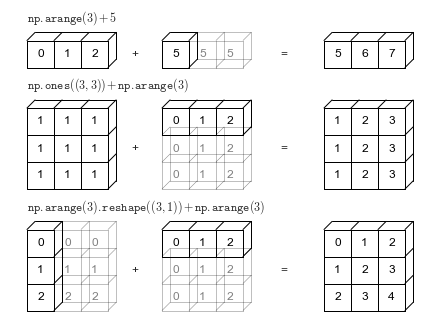.s.
####

In [81]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a+b)

[[ 6  8 10]
 [12 14 16]]


In [82]:
# different shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)
print(a+b)

[[0 2 4]
 [3 5 7]]


In [83]:
#Example 1->
a = np.arange(12).reshape(4,3)
b = np.arange(3)
print(a)
print("\n\n")
print(b)
print("\n Results ->\n")
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]



[0 1 2]

 Results ->

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


##### Example of Error Broadcasting 
1. It will throw n ERROR because (3,4) and (3) first WE CONVERT (1,3) by adding 1 in head then we streched it to (3,3).
2. In this case there is no 1 in the column .Thats why we can not perform Broadcasting here.


In [84]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)
print(a)
print("\n\n")
print(b)
print("\n Results ->\n")
# print(a+b)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]



[0 1 2]

 Results ->



In [85]:
# Example 2 ->
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [86]:
# Example 3 ->
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
print(a)
print("\n")
print(b)
print("Result:-> \n")
print(a + b)


[[0 1 2]]


[[0]
 [1]
 [2]
 [3]]
Result:-> 

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [87]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [88]:
# Example Of Error 
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

# print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [89]:
# Example Of Error 
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

# print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


## Working With Mathmatical Formulas


In [90]:
# Sigmoid convert any given number to the range of 0 to 1
a = np.arange(100)
def sigmoid(array):
    return 1/(1+np.exp(-(array)))

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [91]:
#Mean squared error
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

def mse(actual,predicted):
    return np.mean((actual-predicted)**2)

mse(actual,predicted)


380.4

## Working with missing Values

In [92]:
a = np.array([1,5,69,5,np.nan,6])
a


array([ 1.,  5., 69.,  5., nan,  6.])

In [93]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [94]:
a[np.isnan(a)]

array([nan])

In [95]:
# Final Answer
a[~ np.isnan(a)] # Adding a ~ 

array([ 1.,  5., 69.,  5.,  6.])

# Plotting Graphs 

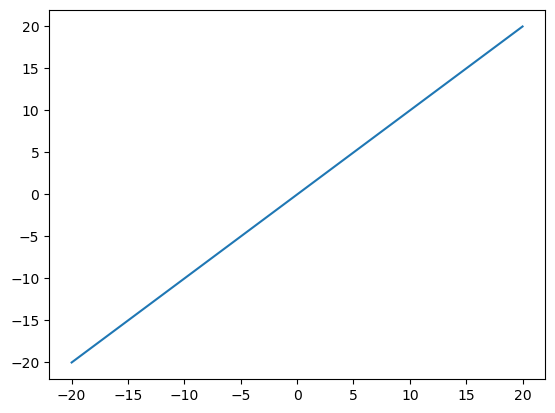

In [96]:
# x=y graph plot 

x = np.linspace(-20,20,100)
y= x
import matplotlib.pyplot as plt

plt.plot(x,y)

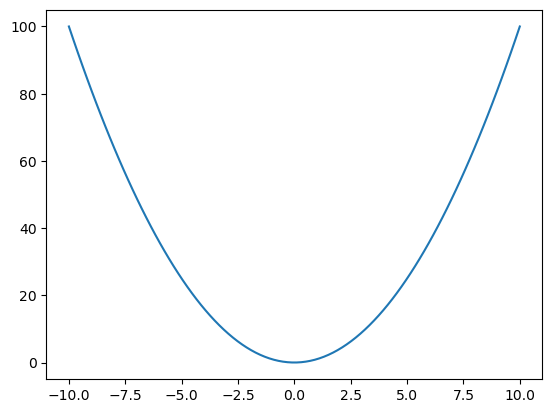

In [97]:
# y = x^2 ->Graph of parabola

x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y)


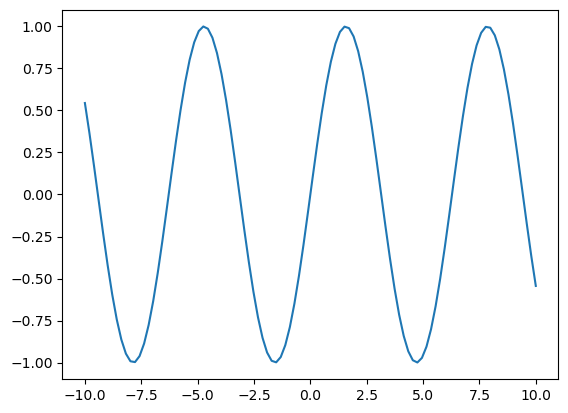

In [98]:
# y = sinx
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y)


C:\Users\Shahin\AppData\Local\Temp\ipykernel_4172\1459615726.py:3: RuntimeWarning: invalid value encountered in log
  y = x * (np.log(x))


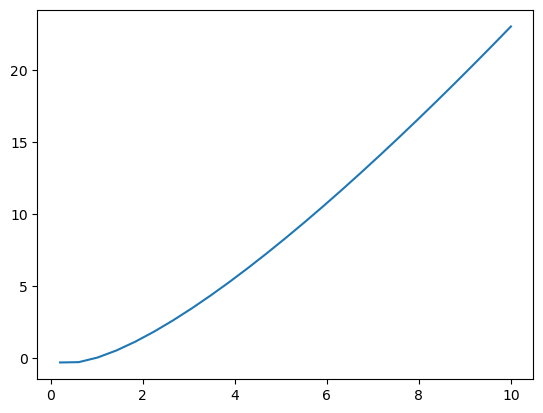

In [99]:
# y = xlogx
x = np.linspace(-10,10,50)
y = x * (np.log(x))

plt.plot(x,y)

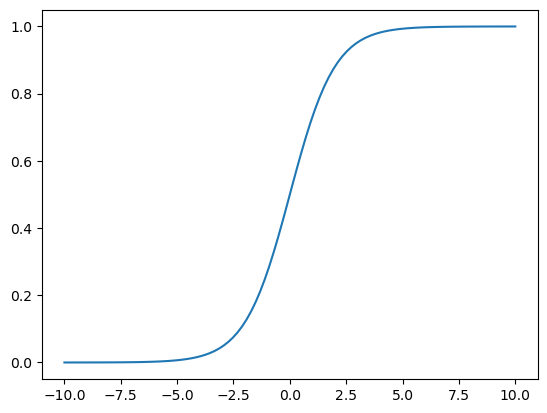

In [100]:
# sigmoid
x = np.linspace(-10,10,100)

y = 1/ (1+np.exp(-x))
plt.plot(x,y)


In [101]:
b

array([[0, 1],
       [2, 3]])

In [102]:

np.size(b)

4

: 